# Synthetic Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

SIZE = 1000

def generate_dataset(size, add_noise=True):
    X = np.random.rand(size, 2)
    y = []
    for i in range(X.shape[0]):
        x1 = X[i,0]
        x2 = X[i,1]
        p = np.clip(0.5 + x2 - x1**2,0.,1.)
        if p < 0.5:
            if add_noise:
                p = p / 2.
            else:
                p = 0.
        if p > 0.5:
            if add_noise:
                p = 1 - p
                p = p / 2.
                p = 1 - p
            else:
                p = 1.
        y.append(np.random.binomial(1,p,1)[0])
    y = np.array(y)
    return X, y

def plot_dataset(X, y, title=None):
    indices_pos = np.where(y == 0)
    indices_neg = np.where(y == 1)
    
    # Plot points
    plt.scatter(X[indices_pos,0], X[indices_pos,1], color='green', marker='o')
    plt.scatter(X[indices_neg,0], X[indices_neg,1], color='black', marker='x')
    
    # Plot y=x^2
    x_dec = np.linspace(0, 1, 200)
    y_dec = x_dec**2
    plt.plot(x_dec, y_dec, color='red', label='y=x^2')
    
    plt.title(title)
    plt.legend()
    plt.show()
    
def train_test_val_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=50)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state=50)
    return X_train, X_test, X_val, y_train, y_test, y_val

def create_dataset(visualize=False):
    X, y = generate_dataset(SIZE, add_noise=True)
    X_train, X_test, X_val, y_train, y_test, y_val = train_test_val_split(X, y)
    if visualize:
        plot_dataset(X, y, title="Whole dataset")
        plot_dataset(X_train, y_train, title="Train dataset")
        plot_dataset(X_test, y_test, title="Test dataset")
        plot_dataset(X_val, y_val, title="Val dataset")
    
    return {
        "X_train": X_train, 
        "X_test": X_test, 
        "X_val": X_val, 
        "y_train": y_train, 
        "y_test": y_test, 
        "y_val": y_val
    }

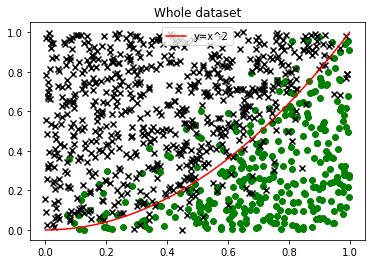

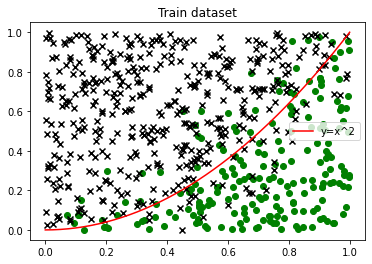

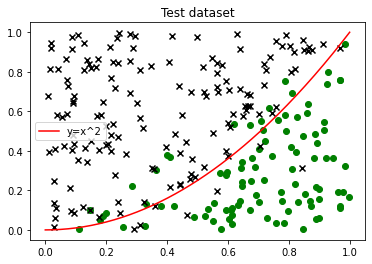

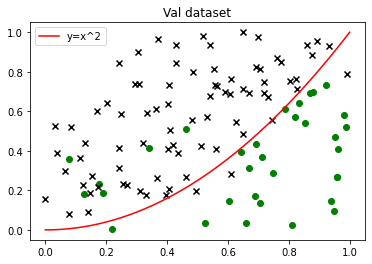

In [2]:
synthetic_dataset = create_dataset(visualize=True)

# Util code

In [60]:
np.set_printoptions(precision=4)

## Support code for decision trees

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

def plot_decision_boundary(model, title='Model decision boundary'):
    x_min = 0.
    x_max = 1.
    y_min = 0.
    y_max = 1.
    plot_step = 0.005
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    x_dec = np.linspace(0, 1, 200)
    y_dec = x_dec**2
    plt.plot(x_dec, y_dec, color='black', label='y=x^2')
    plt.legend()
    
    plt.title(title)
    plt.show()

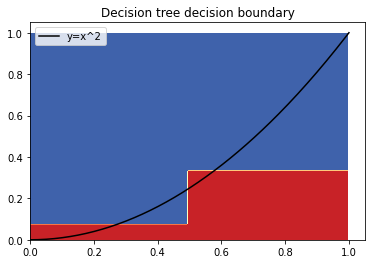

In [4]:
def test_plot_decision_boundary():
    X_train = synthetic_dataset["X_train"]
    y_train = synthetic_dataset["y_train"]
    clf = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
    plot_decision_boundary(clf, 'Decision tree decision boundary')
test_plot_decision_boundary()

## Support code for MOET

In [5]:
import os
import sys
module_path = os.path.abspath('../../')
module_path_found = False
for path in sys.path:
    if path == module_path:
        module_path_found = True
if not module_path_found:
    sys.path.insert(0, module_path)
from viper.moet.moet_classifier_new import MOETClassifierNew


def plot_experts_boundary(model, title='Boundaries of MOET experts'):
    ## Works for 2D space (i.e., 2 features in the inputs) 
    x_min = 0.
    x_max = 1.
    y_min = 0.
    y_max = 1.
    
    plot_step = 0.005
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict_expert(np.c_[xx.ravel(), yy.ravel()])
    print(np.unique(Z))
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z) #, cmap=plt.cm.RdYlBu)
    
    x_dec = np.linspace(0, 1, 200)
    y_dec = x_dec**2
    plt.plot(x_dec, y_dec, color='black', label='y=x^2')
    plt.legend()
    
    plt.title(title)
    plt.show()

In [6]:
def plot_dt_expert_boundary(model, expert_id):
    ## Works for 2D space (i.e., 2 features in the inputs) 
    x_min = 0.
    x_max = 1.
    y_min = 0.
    y_max = 1.
    
    plot_step = 0.005
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    raveled = np.c_[xx.ravel(), yy.ravel()]
    experts = [expert_id] * len(raveled)
    Z = model.predict_with_expert(raveled, experts)

    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z) #, cmap=plt.cm.RdYlBu)
    
    plt.title("Expert {} DT boundaries".format(expert_id))
    plt.show()

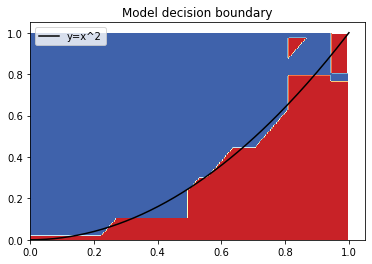

[0 1]


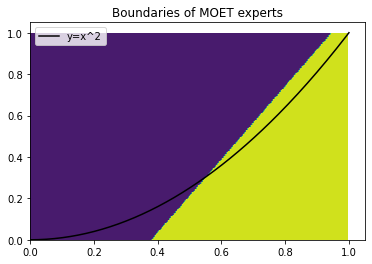

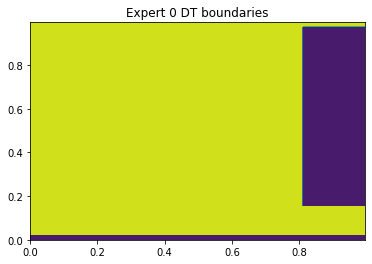

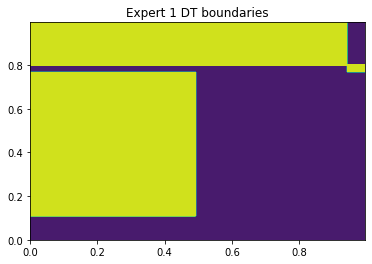

Experts probabilities
[[1.   0.  ]
 [0.89 0.11]
 [0.01 0.99]]
Experts 0 class probabilities
[[5.70e-42 1.00e+00]
 [5.70e-42 1.00e+00]
 [4.27e-01 5.73e-01]]
Experts 1 class probabilities
[[0.00e+00 1.00e+00]
 [2.78e-01 7.22e-01]
 [1.00e+00 7.17e-19]]


In [7]:
def test_moet_plots(dataset):
    experts_depth = 3
    experts = 2
    
    X_train = dataset["X_train"]
    y_train = dataset["y_train"]
    X_val = dataset["X_val"]
    y_val = dataset["y_val"]

    model = MOETClassifierNew(experts_no=experts, no_class=2, use_adam=True)

    model.train(x=X_train, 
                y=y_train,
                x_test=X_val, 
                y_test=y_val,
                max_depth=experts_depth,
                regularization_mode=0, 
                log_frequency=None,
                init_learning_rate=1,
                learning_rate_decay=0.98,
                stop_count=None,
                return_best_epoch=False,
                max_epoch=100)

    plot_decision_boundary(model)
    plot_experts_boundary(model)
    for id in range(experts):
        plot_dt_expert_boundary(model, id)
    
    points = np.array([[0.2, 0.9], [0.4, 0.4], [0.9, 0.05]])
    np.set_printoptions(precision=2)
    print("Experts probabilities")
    print(model.predict_expert_proba(x=points))
    print("Experts 0 class probabilities")
    print(model._dt_proba(expert_id=0, x_normalized=model._normalize_x(points)))
    print("Experts 1 class probabilities")
    print(model._dt_proba(expert_id=1, x_normalized=model._normalize_x(points)))

# TODO: Print decision boundaries of individual decision trees.
    
test_moet_plots(synthetic_dataset)

## Experiment Utils

In [8]:
def train_and_evaluate_moet(dataset,
                            experts,
                            experts_depth,
                            evaluate=True,
                            log_frequency=None,
                            stop_count=None,
                            print_plots=False,
                            return_best_epoch=True,
                            init_learning_rate=1.,
                            learning_rate_decay=0.98,
                            gradually_increase_max_depth=True,
                            max_epoch=100,
                            number_of_classes=2,
                            train_gating_multiple_times=False):
    
    X_train = dataset["X_train"]
    y_train = dataset["y_train"]
    X_val = dataset["X_val"]
    y_val = dataset["y_val"]
    X_test = dataset["X_test"]
    y_test = dataset["y_test"]
    
    model = MOETClassifierNew(experts_no=experts, no_class=number_of_classes, use_adam=True)
    model.train(x=X_train, 
                y=y_train,
                x_test=X_val, 
                y_test=y_val,
                max_depth=experts_depth,
                regularization_mode=0, 
                log_frequency=log_frequency,
                stop_count=stop_count,
                init_learning_rate=init_learning_rate,
                learning_rate_decay=learning_rate_decay,
                max_epoch=max_epoch,
                return_best_epoch=return_best_epoch,
                gradually_increase_max_depth=gradually_increase_max_depth,
                train_gating_multiple_times=train_gating_multiple_times)
    if evaluate:
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        print('experts={},experts_depth={}, train_acc={:.2f},test_acc={:.2f}'.
              format(experts, experts_depth, train_accuracy, test_accuracy))
        
    if print_plots:
        plot_decision_boundary(model, 'MOET ({} expert, {} depth) decision boundary'
                               .format(experts, experts_depth))
        plot_experts_boundary(model, 'MOET ({} expert, {} depth) experts boundary'
                              .format(experts, experts_depth))
    
    return model

In [9]:
# (a) Vary depth of DT

def DT_vary_depth(dataset, min_depth=1, max_depth=15, num_runs=5):
    X_train = dataset["X_train"]
    y_train = dataset["y_train"]
    X_val = dataset["X_val"]
    y_val = dataset["y_val"]
    X_test = dataset["X_test"]
    y_test = dataset["y_test"]
    
    test_mean = []
    test_std = []

    for max_depth in np.arange(min_depth, max_depth + 1, 1):
        train_accuracies = np.zeros(num_runs)
        test_accuracies = np.zeros(num_runs)
        for i in range(num_runs):
            clf = DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train)
            train_accuracies[i] = accuracy_score(y_train, clf.predict(X_train))
            test_accuracies[i] = accuracy_score(y_test, clf.predict(X_test))
        #     print('max_depth={:>2}, train_acc: mean={:.2f}, std={:.2f}, min={:.2f}, max={:.2f}'.format(
        #         max_depth,
        #         np.mean(train_accuracies),
        #         np.std(train_accuracies),
        #         np.min(train_accuracies),
        #         np.max(train_accuracies)))
        #     print('max_depth={:>2}, test_acc:  mean={:.2f}, std={:.2f}, min={:.2f}, max={:.2f}'.format(
        #         max_depth,
        #         np.mean(test_accuracies),
        #         np.std(test_accuracies),
        #         np.min(test_accuracies),
        #         np.max(test_accuracies)))
        test_mean.append(np.mean(test_accuracies))
        test_std.append(np.std(test_accuracies))

    plt.plot(np.arange(min_depth, max_depth + 1, 1), test_mean)
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.title('Decision Tree: Test mean accuracy')
    plt.show()

    plt.plot(np.arange(min_depth, max_depth + 1, 1), test_std)
    plt.xlabel('max_depth')
    plt.ylabel('Std')
    plt.title('Desicion Tree: Test accuracy std')
    plt.show()

In [10]:
# (b) Fix MOET depth and vary #experts

def MOET_vary_experts(dataset, min_experts=2, max_experts=10, experts_depth=0, number_of_classes=2,
                     max_epoch=100, num_runs=5):
    X_train = dataset["X_train"]
    y_train = dataset["y_train"]
    X_val = dataset["X_val"]
    y_val = dataset["y_val"]
    X_test = dataset["X_test"]
    y_test = dataset["y_test"]
    
    test_mean = []
    test_std = []

    for experts in np.arange(min_experts, max_experts + 1, 1):
        train_accuracies = np.zeros(num_runs)
        test_accuracies = np.zeros(num_runs)
        for i in range(num_runs):
            clf = train_and_evaluate_moet(dataset, experts, experts_depth, evaluate=False, print_plots=False,
                                         number_of_classes=number_of_classes,
                                         max_epoch=max_epoch)
            train_accuracies[i] = accuracy_score(y_train, clf.predict(X_train))
            test_accuracies[i] = accuracy_score(y_test, clf.predict(X_test))
        test_mean.append(np.mean(test_accuracies))
        test_std.append(np.std(test_accuracies))
    
    plt.plot(np.arange(min_experts, max_experts + 1, 1), test_mean)
    plt.xlabel('experts')
    plt.ylabel('Accuracy')
    plt.title('MOET (experts_depth={}): Test mean accuracy'.format(experts_depth))
    plt.show()

    plt.plot(np.arange(min_experts, max_experts + 1, 1), test_std)
    plt.xlabel('experts')
    plt.ylabel('Std')
    plt.title('MOET (experts_depth={}): Test accuracy std'.format(experts_depth))
    plt.show()

In [11]:
# (c) Fix MOET #experts and vary depth of experts

def MOET_vary_experts_depth(dataset, min_depth=0, max_depth=12, experts=2,
                           max_epoch=100, num_runs=5):
    X_train = dataset["X_train"]
    y_train = dataset["y_train"]
    X_val = dataset["X_val"]
    y_val = dataset["y_val"]
    X_test = dataset["X_test"]
    y_test = dataset["y_test"]
    
    test_mean = []
    test_std = []

    for experts_depth in np.arange(min_depth, max_depth + 1, 1):
        train_accuracies = np.zeros(num_runs)
        test_accuracies = np.zeros(num_runs)
        for i in range(num_runs):
            clf = train_and_evaluate_moet(dataset, experts, experts_depth, evaluate=False, print_plots=False,
                                         max_epoch=max_epoch)
            train_accuracies[i] = accuracy_score(y_train, clf.predict(X_train))
            test_accuracies[i] = accuracy_score(y_test, clf.predict(X_test))
        test_mean.append(np.mean(test_accuracies))
        test_std.append(np.std(test_accuracies))


    plt.plot(np.arange(min_depth, max_depth + 1, 1), test_mean)
    plt.xlabel('depth')
    plt.ylabel('Accuracy')
    plt.title('MOET (#experts={}): Test mean accuracy'.format(experts))
    plt.show()

    plt.plot(np.arange(min_depth, max_depth + 1, 1), test_std)
    plt.xlabel('depth')
    plt.ylabel('Std')
    plt.title('MOET (#experts={}): Test accuracy std'.format(experts))
    plt.show()

In [12]:
# (d) Fix MOET effective depth and vary #experts and experts depths.

import math


def MOET_evaluate_effective_depth(dataset, 
                                  effective_depth,
                                  max_epoch=100,
                                  number_of_classes=2,
                                  min_depth=0,
                                  max_depth=10,
                                  min_experts=2,
                                  max_experts=8,
                                  figsize=(15,5),
                                  num_runs=5):
    X_train = dataset["X_train"]
    y_train = dataset["y_train"]
    X_val = dataset["X_val"]
    y_val = dataset["y_val"]
    X_test = dataset["X_test"]
    y_test = dataset["y_test"]

    test_mean = []
    test_std = []
    labels = []

    for experts_depth in np.arange(min_depth, max_depth + 1, 1):
        for experts in np.arange(min_experts, max_experts + 1, 1):
            real_depth = int(math.ceil(math.log(experts, 2))) + experts_depth
            if real_depth != effective_depth:
                continue
            train_accuracies = np.zeros(num_runs)
            test_accuracies = np.zeros(num_runs)
            for i in range(num_runs):
                clf = train_and_evaluate_moet(dataset,
                                              experts, 
                                              experts_depth, 
                                              evaluate=False,
                                              print_plots=False,
                                              max_epoch=max_epoch,
                                              number_of_classes=number_of_classes)
                train_accuracies[i] = accuracy_score(y_train, clf.predict(X_train))
                test_accuracies[i] = accuracy_score(y_test, clf.predict(X_test))
            test_mean.append(np.mean(test_accuracies))
            test_std.append(np.std(test_accuracies))
            labels.append('e{}_d{}'.format(experts, experts_depth))


    plt.figure(figsize=figsize)
    if len(labels) > 1:
        plt.plot(labels, test_mean)
    else:
        plt.scatter(labels, test_mean)
    plt.xlabel('depth')
    plt.ylabel('Accuracy')
    plt.title('MOET (effective_depth={}): Test mean accuracy'.format(effective_depth))
    plt.show()

    plt.figure(figsize=figsize)
    if len(labels) > 1:
        plt.plot(labels, test_std)
    else:
        plt.scatter(labels, test_std)
    plt.xlabel('config')
    plt.ylabel('Std')
    plt.title('MOET (effective_depth={}): Test accuracy std'.format(effective_depth))
    plt.show()

In [62]:
# (a) Evaluate learning_rate effects

def MOET_vary_learning_rate(dataset,
                            experts=2, 
                            depth=3, 
                            number_of_classes=2,
                            init_learning_rates=[1., 0.3, 0.03, 0.01],
                            learning_rate_decays=[0.98, 0.9],
                            max_epochs=[100],
                            train_gating_multiple_times=False,
                            num_runs=5):
    X_train = dataset["X_train"]
    y_train = dataset["y_train"]
    X_val = dataset["X_val"]
    y_val = dataset["y_val"]
    X_test = dataset["X_test"]
    y_test = dataset["y_test"]
    
    
    test_mean = []
    test_std = []
    labels = []
    
    # init_learning_rates=[1., 0.3, 0.1, 0.03, 0.01]
    # learning_rate_decays=[0.98, 0.9]

    for init_learning_rate in init_learning_rates:
        for learning_rate_decay in learning_rate_decays:
            for max_epoch in max_epochs:
                train_accuracies = np.zeros(num_runs)
                test_accuracies = np.zeros(num_runs)
                for i in range(num_runs):
                    clf = train_and_evaluate_moet(dataset,
                                                  experts, 
                                                  depth, 
                                                  evaluate=False, 
                                                  print_plots=False,
                                                  init_learning_rate=init_learning_rate,
                                                  learning_rate_decay=learning_rate_decay,
                                                  number_of_classes=number_of_classes,
                                                  max_epoch=max_epoch,
                                                  train_gating_multiple_times=train_gating_multiple_times)
                    train_accuracies[i] = accuracy_score(y_train, clf.predict(X_train))
                    test_accuracies[i] = accuracy_score(y_test, clf.predict(X_test))
                test_mean.append(np.mean(test_accuracies))
                test_std.append(np.std(test_accuracies))
                name = 'L{}'.format(init_learning_rates.index(init_learning_rate))
                if len(learning_rate_decays) > 1:
                    name = name + '_D{}'.format(learning_rate_decays.index(learning_rate_decay))
                if len(max_epochs) > 1:
                    name = name + '_E{}'.format(max_epochs.index(max_epoch))
                labels.append(name)
    
    test_mean = np.array(test_mean)
    test_std = np.array(test_std)
    
    fig, ax = plt.subplots(1, figsize=(15, 4))
    
    ax.set_xlabel('config')
    ax.set_ylabel('accuracy')
    
    ax.plot(labels, test_mean, lw=2, color='blue')
    ax.fill_between(labels, 
                    test_mean + test_std, 
                    test_mean - test_std, 
                    facecolor='blue', 
                    alpha=0.5)
    ax.grid()
    plt.show()

In [14]:
# (b) Evaluate max_epoch effects

def MOET_vary_max_epoch(dataset, 
                        experts=2, 
                        depth=3,
                        number_of_classes=2,
                        max_epochs=[1,5,10,25,50,100],
                        init_learning_rates=[1.,0.3],
                        num_runs=5):
    X_train = dataset["X_train"]
    y_train = dataset["y_train"]
    X_val = dataset["X_val"]
    y_val = dataset["y_val"]
    X_test = dataset["X_test"]
    y_test = dataset["y_test"]
    
    test_mean = []
    test_std = []
    labels = []
    
    learning_rate_decay = 0.98

    for max_epoch in max_epochs:
        for init_learning_rate in init_learning_rates:
            train_accuracies = np.zeros(num_runs)
            test_accuracies = np.zeros(num_runs)
            for i in range(num_runs):
                clf = train_and_evaluate_moet(dataset,
                                              experts, 
                                              experts_depth, 
                                              evaluate=False, 
                                              print_plots=False,
                                              init_learning_rate=init_learning_rate,
                                              learning_rate_decay=learning_rate_decay,
                                              max_epoch=max_epoch,
                                              number_of_classes=number_of_classes)
                train_accuracies[i] = accuracy_score(y_train, clf.predict(X_train))
                test_accuracies[i] = accuracy_score(y_test, clf.predict(X_test))
            test_mean.append(np.mean(test_accuracies))
            test_std.append(np.std(test_accuracies))
            labels.append('{}_{}'.format(max_epoch,
                                         init_learning_rate))



    fig = plt.figure(figsize=(15, 4))
    plt.plot(labels, test_mean)
    plt.xlabel('depth')
    plt.ylabel('Accuracy')
    plt.title('MOET (#experts={}, depth={}): Test mean accuracy'.format(experts,
                                                                       depth))
    plt.show()

    fig = plt.figure(figsize=(15, 1))
    plt.plot(labels, test_std)
    plt.xlabel('depth')
    plt.ylabel('Std')
    plt.title('MOET (#experts={}, depth={}): Test accuracy std'.format(experts,
                                                                       depth))

    plt.show()

In [15]:
# (c) Evaluate return_best_epoch effects

def MOET_vary_return_best_epoch(dataset, experts=2, depth=3, max_epoch=100, num_runs=5):
    X_train = dataset["X_train"]
    y_train = dataset["y_train"]
    X_val = dataset["X_val"]
    y_val = dataset["y_val"]
    X_test = dataset["X_test"]
    y_test = dataset["y_test"]
    
    test_mean = []
    test_std = []
    labels = []
    
    return_best_epochs = [True, False]

    for return_best_epoch in return_best_epochs:
        train_accuracies = np.zeros(num_runs)
        test_accuracies = np.zeros(num_runs)
        for i in range(num_runs):
            clf = train_and_evaluate_moet(dataset,
                                          experts, 
                                          experts_depth, 
                                          evaluate=False, 
                                          print_plots=False,
                                          return_best_epoch=return_best_epoch,
                                          max_epoch=max_epoch)
            train_accuracies[i] = accuracy_score(y_train, clf.predict(X_train))
            test_accuracies[i] = accuracy_score(y_test, clf.predict(X_test))
        test_mean.append(np.mean(test_accuracies))
        test_std.append(np.std(test_accuracies))
        labels.append('{}'.format(return_best_epoch))


    plt.plot(labels, test_mean)
    plt.xlabel('depth')
    plt.ylabel('Accuracy')
    plt.title('MOET (#experts={}, depth={}): Test mean accuracy'.format(experts,
                                                                       depth))
    plt.show()

    plt.plot(labels, test_std)
    plt.xlabel('depth')
    plt.ylabel('Std')
    plt.title('MOET (#experts={}, depth={}): Test accuracy std'.format(experts,
                                                                       depth))

    plt.show()

In [16]:
# (e) Evaluate effect of gradual increasing of max_depth throughout MOET training.

def MOET_gradual_depth_increase(dataset, experts=2, depth=3, max_epoch=100, num_runs=5):
    X_train = dataset["X_train"]
    y_train = dataset["y_train"]
    X_val = dataset["X_val"]
    y_val = dataset["y_val"]
    X_test = dataset["X_test"]
    y_test = dataset["y_test"]
    
    test_mean = []
    test_std = []
    labels = []
    
    gradually_increase_depths = [True, False]
    return_best_epochs = [True, False]

    for gradually_increase_depth in gradually_increase_depths:
        for return_best_epoch in return_best_epochs:
            train_accuracies = np.zeros(num_runs)
            test_accuracies = np.zeros(num_runs)
            for i in range(num_runs):
                clf = train_and_evaluate_moet(
                    dataset,
                    experts, 
                    experts_depth, 
                    evaluate=False, 
                    print_plots=False,
                    return_best_epoch=True,
                    gradually_increase_max_depth=gradually_increase_depth,
                    max_epoch=max_epoch)
                train_accuracies[i] = accuracy_score(y_train, clf.predict(X_train))
                test_accuracies[i] = accuracy_score(y_test, clf.predict(X_test))
            test_mean.append(np.mean(test_accuracies))
            test_std.append(np.std(test_accuracies))
            labels.append('g{}_b{}'.format(gradually_increase_depth,
                                           return_best_epoch))


    plt.plot(labels, test_mean)
    plt.xlabel('depth')
    plt.ylabel('Accuracy')
    plt.title('MOET (#experts={}, depth={}): Test mean accuracy'.format(experts,
                                                                       depth))
    plt.show()

    plt.plot(labels, test_std)
    plt.xlabel('depth')
    plt.ylabel('Std')
    plt.title('MOET (#experts={}, depth={}): Test accuracy std'.format(experts,
                                                                       depth))

    plt.show()

## Compare variance and performance of DTs and MOET.
- (a) Vary depth of DT
- (b) Fix MOET depth and vary experts
- (c) Fix MOET experts and vary depth of experts
- (d) Fix MOET effective depth and vary #experts and experts depths.
- (e) TODO: Calculate % of area that is correctly predicted (true distrib. is known: y = x^2)

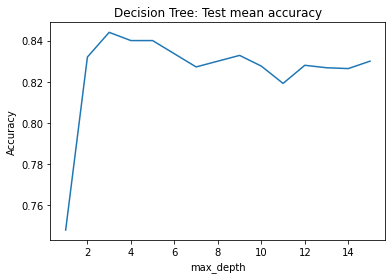

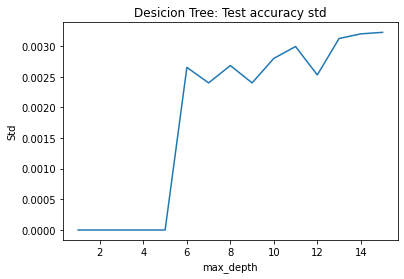

KeyboardInterrupt: 

In [18]:
# (a)
DT_vary_depth(synthetic_dataset)
# (b)
MOET_vary_experts(synthetic_dataset)
# (c)
MOET_vary_experts_depth(synthetic_dataset)

In [ ]:
# (d)
for effective_depth in (np.arange(5) + 1):
    MOET_evaluate_effective_depth(synthetic_dataset, effective_depth)

## Evalute performance of MOET

- (a) Evaluate learning_rate effects
- (b) Evaluate max_epoch effects
- (c) Evaluate return_best_epoch effects
- (d) Evaluate effect of gradual increasing of max_depth throughout MOET training.
    - It appears that if expert depth is too large, in the first iteration decision tree takes over control, i.e., there's one decision tree expert taking own responsibility of large portion of the space, and thus the gating function does not contribute much. To solve this I am working on gradually increasing depth of experts during MOET training.
- (e) TODO: Check if f1 score or accuracy should be used for choosing the best model in MOET.

In [ ]:
# (a)
MOET_vary_learning_rate(synthetic_dataset)

In [ ]:
MOET_vary_max_epoch(synthetic_dataset)

In [ ]:
MOET_vary_return_best_epoch(synthetic_dataset, experts=2, depth=3)
MOET_vary_return_best_epoch(synthetic_dataset, experts=2, depth=4)
MOET_vary_return_best_epoch(synthetic_dataset, experts=2, depth=5)

In [ ]:
MOET_gradual_depth_increase(synthetic_dataset, experts=2, depth=0)
MOET_gradual_depth_increase(synthetic_dataset, experts=2, depth=2)
MOET_gradual_depth_increase(synthetic_dataset, experts=2, depth=4)
MOET_gradual_depth_increase(synthetic_dataset, experts=2, depth=6)
MOET_gradual_depth_increase(synthetic_dataset, experts=2, depth=8)

## New

TODO:
- Create a stop-sign like dataset and see if MOET can fit it perfectly.
- Use 1-weight for all instances expert is responsible for, and 0 for others (hard thresholding of probabilities, instead of currently used soft version).

In [ ]:
for experts in [2, 3]:
    for experts_depth in [0,1,2,3,None]:
        train_and_evaluate_moet(synthetic_dataset, experts, experts_depth, print_plots=False)

In [ ]:
train_and_evaluate_moet(7, 0, print_plots=True)

# Another synthetic dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

SIZE = 1000

def generate_synthetic2_dataset(size, add_noise=True):
    X = np.random.rand(size, 2)
    y = []
    for i in range(X.shape[0]):
        x1 = X[i,0]
        x2 = X[i,1]
        if x1 + x2 < 1:
            if x1 < 0.5:
                y.append(1)
            else:
                y.append(0)
        else:
            if x1 < 0.5:
                y.append(0)
            else:
                y.append(1)
    y = np.array(y)
    return X, y

def plot_synthetic2_dataset(X, y, title=None):
    indices_pos = np.where(y == 0)
    indices_neg = np.where(y == 1)
    
    # Plot points
    plt.scatter(X[indices_pos,0], X[indices_pos,1], color='green', marker='o')
    plt.scatter(X[indices_neg,0], X[indices_neg,1], color='black', marker='x')
    
    plt.title(title)
    plt.show()

def create_synthetic2_dataset(visualize=False):
    X, y = generate_synthetic2_dataset(SIZE, add_noise=True)
    X_train, X_test, X_val, y_train, y_test, y_val = train_test_val_split(X, y)
    if visualize:
        plot_synthetic2_dataset(X, y, title="Whole dataset")
        plot_synthetic2_dataset(X_train, y_train, title="Train dataset")
        plot_synthetic2_dataset(X_test, y_test, title="Test dataset")
        plot_synthetic2_dataset(X_val, y_val, title="Val dataset")
    
    return {
        "X_train": X_train, 
        "X_test": X_test, 
        "X_val": X_val, 
        "y_train": y_train, 
        "y_test": y_test, 
        "y_val": y_val
    }

In [ ]:
synthetic2_dataset = create_synthetic2_dataset(visualize=True)

In [ ]:
def test():
    X_train = synthetic2_dataset["X_train"]
    y_train = synthetic2_dataset["y_train"]
    clf = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)
    plot_decision_boundary(clf, 'Decision tree decision boundary')
test()

In [ ]:
def test_moet_plots(dataset):
    experts_depth = 2
    experts = 2
    
    X_train = dataset["X_train"]
    y_train = dataset["y_train"]
    X_val = dataset["X_val"]
    y_val = dataset["y_val"]
    X_test = dataset["X_test"]
    y_test = dataset["y_test"]

    model = MOETClassifierNew(experts_no=experts, no_class=2, use_adam=True)

    model.train(x=X_train, 
                y=y_train,
                x_test=X_val, 
                y_test=y_val,
                max_depth=experts_depth,
                regularization_mode=0, 
                log_frequency=None,
                init_learning_rate=1,
                learning_rate_decay=0.98,
                stop_count=None,
                return_best_epoch=False,
                max_epoch=100)

    plot_decision_boundary(model)
    plot_experts_boundary(model)
    for id in range(experts):
        plot_dt_expert_boundary(model, expert_id=id)
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    print(model.dtc_list)
    
    print('experts={},experts_depth={}, train_acc={:.2f},test_acc={:.2f}'.
              format(experts, experts_depth, train_accuracy, test_accuracy))
    
    points = np.array([[0.2, 0.9], [0.4, 0.4], [0.9, 0.05]])
    np.set_printoptions(precision=2)
    print("Experts probabilities")
    print(model.predict_expert_proba(x=points))
    print("Experts 0 class probabilities")
    print(model._dt_proba(expert_id=0, x_normalized=model._normalize_x(points)))
    print("Experts 1 class probabilities")
    print(model._dt_proba(expert_id=1, x_normalized=model._normalize_x(points)))

# TODO: Print decision boundaries of individual decision trees.
    
test_moet_plots(synthetic2_dataset)

# Acrobot Dataset

In [ ]:
def create_acrobot_dataset(max_examples=None):
    X = np.loadtxt(open("./test_data/acrobot_observations.csv", "rb"), delimiter=",")
    y = np.loadtxt(open("./test_data/acrobot_actions.csv", "rb"), delimiter=",").astype(int)
    
    m = X.shape[0]
    assert X.shape == (m, 6)
    assert y.shape == (m,)
    
    if max_examples:
        X = X[:max_examples]
        y = y[:max_examples]
        
    X_train, X_test, X_val, y_train, y_test, y_val = train_test_val_split(X, y)
    
    return {
        "X_train": X_train, 
        "X_test": X_test, 
        "X_val": X_val, 
        "y_train": y_train, 
        "y_test": y_test, 
        "y_val": y_val
    }

In [ ]:
acrobot_dataset = create_acrobot_dataset()

In [ ]:
DT_vary_depth(acrobot_dataset, min_depth=1, max_depth=12)

In [ ]:
MOET_vary_experts(acrobot_dataset, 
                  max_experts=8, 
                  number_of_classes=3,
                  max_epoch=20)

In [ ]:
# TODO:
# Compare DT with depth 1 with MOET with effective depth 1
# Tune parameters of MOET

MOET_vary_learning_rate(acrobot_dataset,
                        experts=2, 
                        depth=0, 
                        number_of_classes=3,
                        init_learning_rates=[2., 1., 0.3, 0.1, 0.01],
                        learning_rate_decays=[1., 0.98],
                        max_epoch=50)

In [ ]:
MOET_vary_learning_rate(acrobot_dataset,
                        experts=2, 
                        depth=1, 
                        number_of_classes=3,
                        init_learning_rates=[2., 1., 0.3, 0.1, 0.01],
                        learning_rate_decays=[1., 0.98],
                        max_epoch=50)

In [ ]:
MOET_vary_learning_rate(acrobot_dataset,
                        experts=2, 
                        depth=2, 
                        number_of_classes=3,
                        init_learning_rates=[2., 1., 0.3, 0.1, 0.01],
                        learning_rate_decays=[1., 0.98],
                        max_epoch=50)

In [ ]:
MOET_vary_learning_rate(acrobot_dataset,
                        experts=8, 
                        depth=1, 
                        number_of_classes=3,
                        init_learning_rates=[2., 1., 0.3, 0.1, 0.01],
                        learning_rate_decays=[1., 0.98],
                        max_epoch=50)

In [ ]:
MOET_evaluate_effective_depth(acrobot_dataset,
                              effective_depth=3,
                              max_epoch=50,
                              number_of_classes=3)

In [ ]:
MOET_evaluate_effective_depth(acrobot_dataset,
                              effective_depth=4,
                              max_epoch=50,
                              number_of_classes=3)

In [ ]:
MOET_evaluate_effective_depth(acrobot_dataset,
                              effective_depth=4,
                              max_epoch=50,
                              number_of_classes=3,
                              min_experts=9,
                              max_experts=16)

In [ ]:
MOET_evaluate_effective_depth(acrobot_dataset,
                              effective_depth=5,
                              max_epoch=50,
                              number_of_classes=3,
                              min_experts=2,
                              max_experts=16)

In [ ]:
MOET_vary_max_epoch(acrobot_dataset,
                    experts=8,
                    depth=1,
                    max_epochs=[1,2,3,5,10,20,25,50,100],
                    init_learning_rates=[1.,0.3],
                    number_of_classes=3)

# MountainCar Dataset

In [17]:
def create_mountaincar_dataset(max_examples=None):
    X = np.loadtxt(open("./test_data/mountaincar_observations.csv", "rb"), delimiter=",")
    y = np.loadtxt(open("./test_data/mountaincar_actions.csv", "rb"), delimiter=",").astype(int)
    
    m = X.shape[0]
    assert X.shape == (m, 2)
    assert y.shape == (m,)
    
    if max_examples:
        X = X[:max_examples]
        y = y[:max_examples]
        
    X_train, X_test, X_val, y_train, y_test, y_val = train_test_val_split(X, y)
    
    return {
        "X_train": X_train, 
        "X_test": X_test, 
        "X_val": X_val, 
        "y_train": y_train, 
        "y_test": y_test, 
        "y_val": y_val
    }

In [18]:
import numpy as np
mountaincar_dataset = create_mountaincar_dataset()

In [19]:
from matplotlib import colors

MIN_POSITION = -1.2
MAX_POSITION = 0.6
MIN_VELOCITY = -0.07
MAX_VELOCITY = 0.07

def plot_mountaincar_dataset(X, y):
    color_list = ['green', 'yellow', 'blue']
    cmap = colors.ListedColormap(color_list)
    
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap)

    plt.xlim([MIN_POSITION, MAX_POSITION])
    plt.ylim([MIN_VELOCITY, MAX_VELOCITY])
    
    plt.xlabel('position')
    plt.ylabel('velocity')
    plt.title('Mountaincar dataset')
    plt.show()
    
    
def visualize_mountaincar_policy(policy):
    interpolation_steps = 100
    step_position = float(MAX_POSITION - MIN_POSITION) / interpolation_steps
    step_velocity = float(MAX_VELOCITY - MIN_VELOCITY) / interpolation_steps

    x, y = np.meshgrid(np.arange(MIN_POSITION, 
                                 MAX_POSITION + step_position,
                                 step_position),
                       np.arange(MIN_VELOCITY, 
                                 MAX_VELOCITY + step_velocity,
                                 step_velocity))
    z = np.zeros((x.shape[0] - 1, x.shape[1] - 1), dtype=np.int)

    for i in range(x.shape[0] - 1):
        for j in range(x.shape[1] - 1):
            position = x[i][j]
            velocity = y[i][j]
            decision = policy.predict(np.array([[position, velocity]]))[
                           0] - 1
            z[i, j] = decision

    z_min = -1
    z_max = 1

    fig, ax = plt.subplots()

    colorsList = ['green', 'yellow', 'blue']
    cmap = colors.ListedColormap(colorsList)

    c = ax.pcolormesh(x, y, z, cmap=cmap, vmin=z_min, vmax=z_max)
    ax.set_xlabel('position')
    ax.set_ylabel('velocity')
    # set the limits of the plot to the limits of the data
    ax.axis([MIN_POSITION, MAX_POSITION, MIN_VELOCITY, MAX_VELOCITY])

    # fig.colorbar(c, ax=ax)

    fig.tight_layout()
    plt.show()
    plt.close(fig)

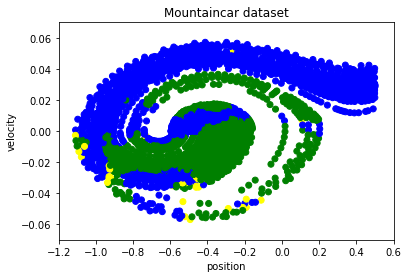

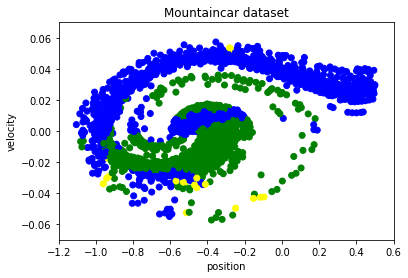

In [20]:
plot_mountaincar_dataset(mountaincar_dataset['X_train'], 
                         mountaincar_dataset['y_train'])

plot_mountaincar_dataset(mountaincar_dataset['X_test'], 
                         mountaincar_dataset['y_test'])

In [ ]:
for experts_depth in [1, 2, 3, 4, 5, 6]:
    print('effective_depth={}, experts=8, experts_depth={}'.format(
      experts_depth + 3, experts_depth))
    model = train_and_evaluate_moet(mountaincar_dataset,
                                    experts=8,
                                    experts_depth=experts_depth,
                                    evaluate=True,
                                    log_frequency=None,
                                    stop_count=None,
                                    print_plots=False,
                                    return_best_epoch=True,
                                    init_learning_rate=1.,
                                    learning_rate_decay=0.98,
                                    gradually_increase_max_depth=True,
                                    max_epoch=50,
                                    number_of_classes=3)
    visualize_mountaincar_policy(model)

In [24]:
def train_DT(dataset, max_depth):
    X_train = dataset["X_train"]
    y_train = dataset["y_train"]
    X_test = dataset["X_test"]
    y_test = dataset["y_test"]
    model = DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print('max_depth={}, train_acc={:.2f},test_acc={:.2f}'.
            format(max_depth, train_accuracy, test_accuracy))
    return model

max depth: 1
max_depth=1, train_acc=0.85,test_acc=0.85


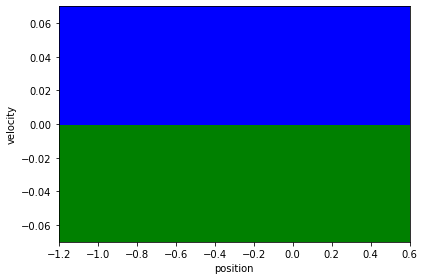

max depth: 2
max_depth=2, train_acc=0.87,test_acc=0.87


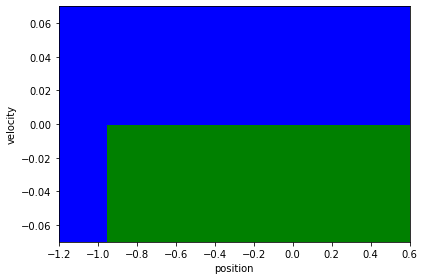

max depth: 3
max_depth=3, train_acc=0.89,test_acc=0.89


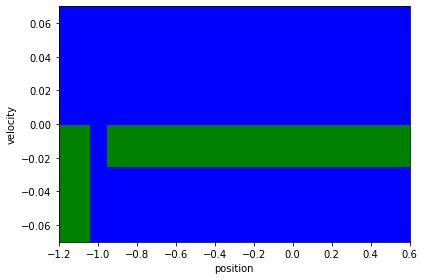

max depth: 4
max_depth=4, train_acc=0.92,test_acc=0.92


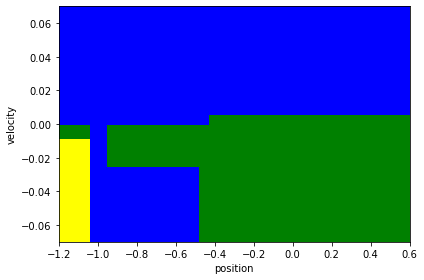

max depth: 5
max_depth=5, train_acc=0.93,test_acc=0.93


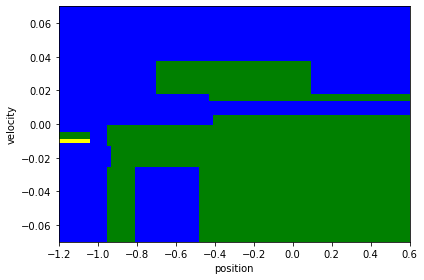

max depth: 6
max_depth=6, train_acc=0.95,test_acc=0.95


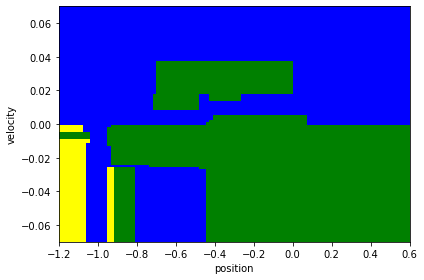

max depth: 7
max_depth=7, train_acc=0.97,test_acc=0.96


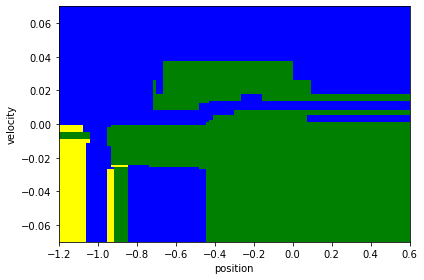

max depth: 8
max_depth=8, train_acc=0.98,test_acc=0.97


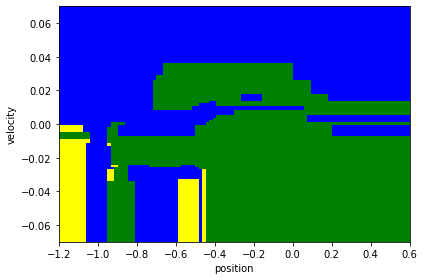

max depth: 9
max_depth=9, train_acc=0.99,test_acc=0.98


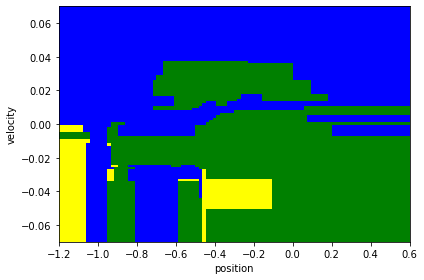

max depth: 10
max_depth=10, train_acc=0.99,test_acc=0.98


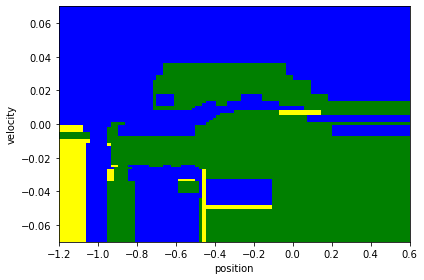

In [25]:
for max_depth in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    print("max depth: {}".format(max_depth))
    dt_model = train_DT(mountaincar_dataset, max_depth)
    visualize_mountaincar_policy(dt_model)

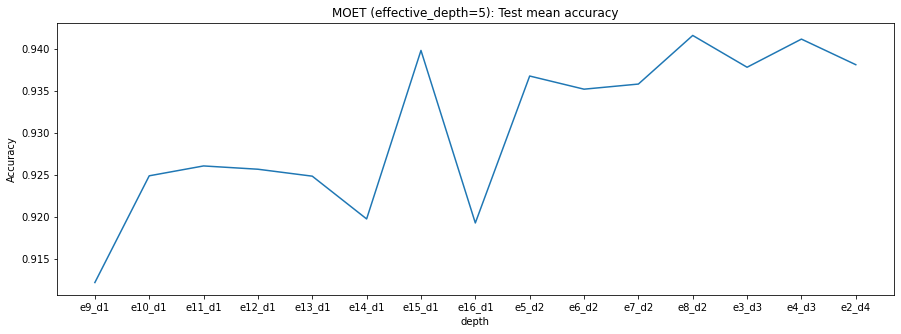

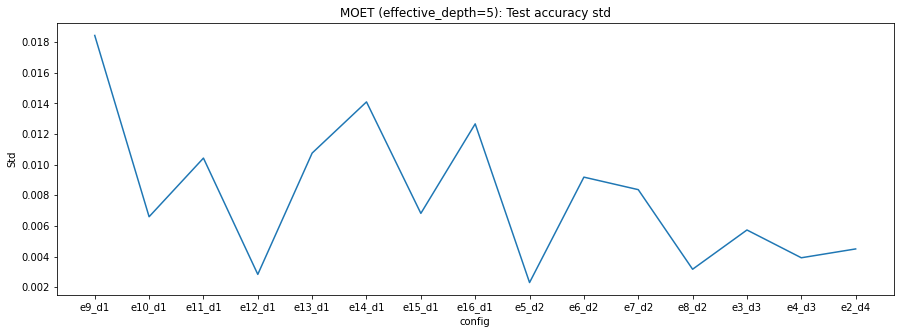

In [37]:
MOET_evaluate_effective_depth(mountaincar_dataset, 
                              effective_depth=5,
                              max_epoch=40,
                              number_of_classes=3,
                              min_depth=0,
                              max_depth=10,
                              min_experts=2,
                              max_experts=16,
                              figsize=(15,5),
                              num_runs=3)

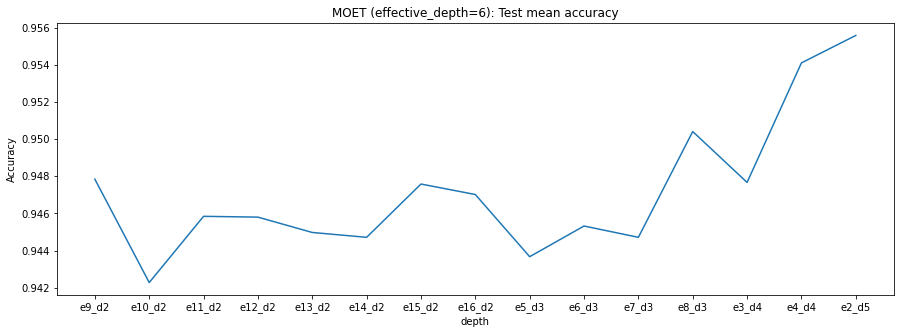

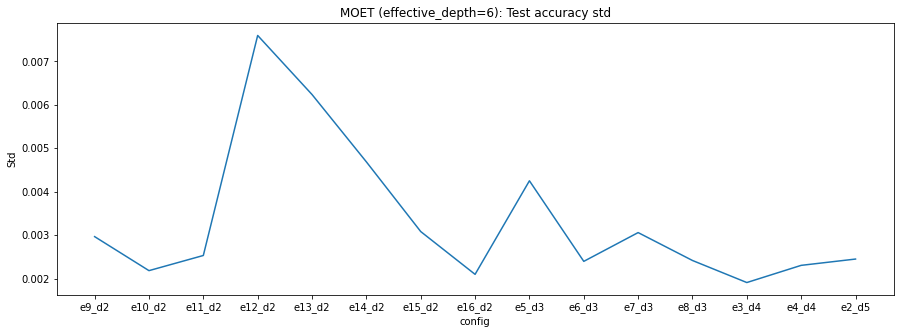

In [38]:
MOET_evaluate_effective_depth(mountaincar_dataset, 
                              effective_depth=6,
                              max_epoch=40,
                              number_of_classes=3,
                              min_depth=0,
                              max_depth=10,
                              min_experts=2,
                              max_experts=16,
                              figsize=(15,5))

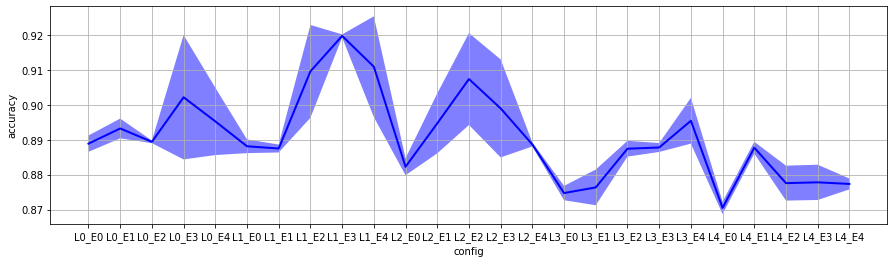

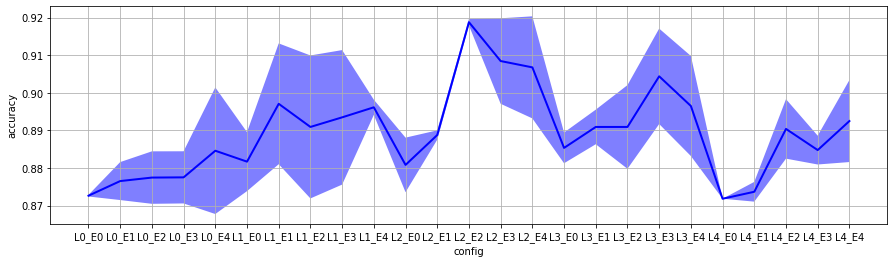

In [65]:
MOET_vary_learning_rate(mountaincar_dataset,
                        experts=2, 
                        depth=2, 
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001, 1e-4, 1e-5],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=False,
                        num_runs=3)

MOET_vary_learning_rate(mountaincar_dataset,
                        experts=2,
                        depth=2,
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=True,
                        num_runs=3)

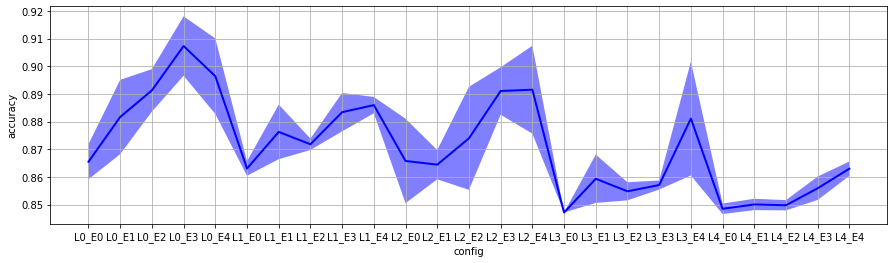

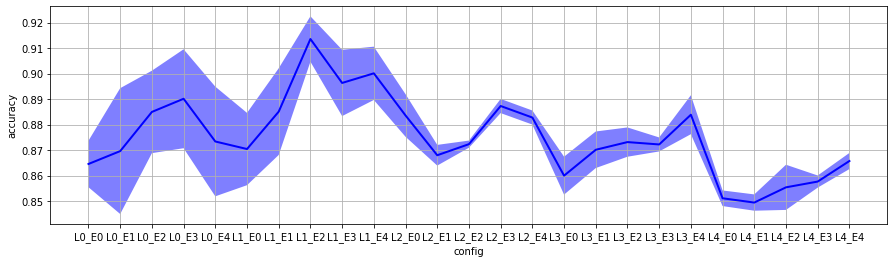

In [66]:
MOET_vary_learning_rate(mountaincar_dataset,
                        experts=4, 
                        depth=1, 
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=False,
                        num_runs=3)

MOET_vary_learning_rate(mountaincar_dataset,
                        experts=4,
                        depth=1,
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=True,
                        num_runs=3)

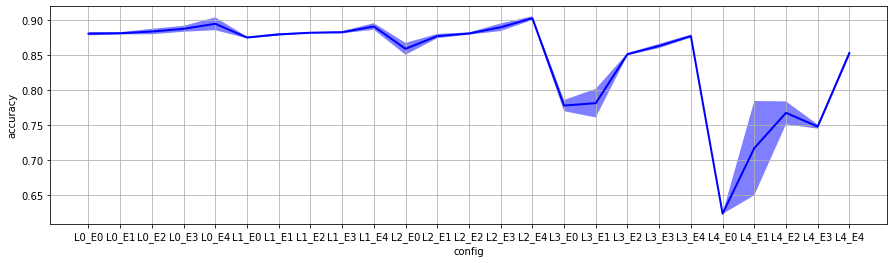

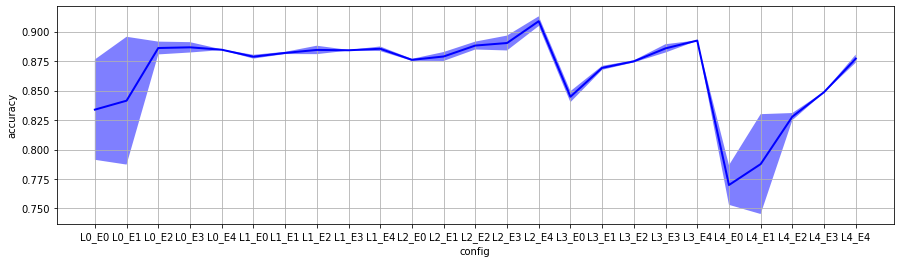

In [67]:
MOET_vary_learning_rate(mountaincar_dataset,
                        experts=8, 
                        depth=0, 
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=False,
                        num_runs=3)

MOET_vary_learning_rate(mountaincar_dataset,
                        experts=8,
                        depth=0,
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=True,
                        num_runs=3)

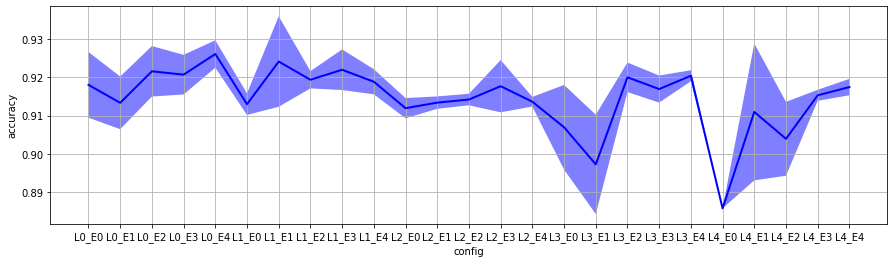

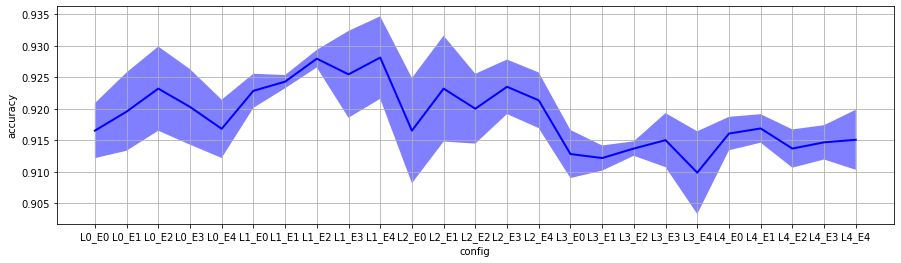

In [68]:
MOET_vary_learning_rate(mountaincar_dataset,
                        experts=2, 
                        depth=3, 
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=False,
                        num_runs=3)

MOET_vary_learning_rate(mountaincar_dataset,
                        experts=2,
                        depth=3,
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=True,
                        num_runs=3)

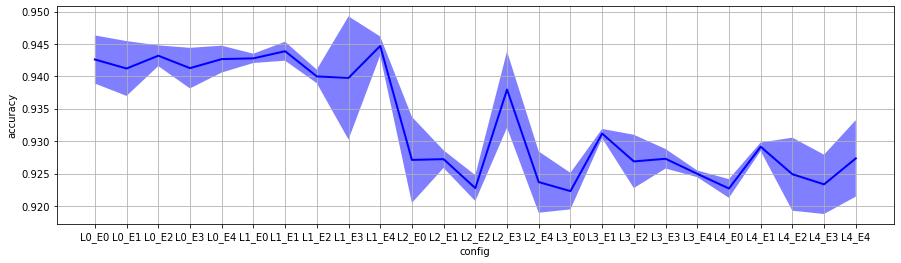

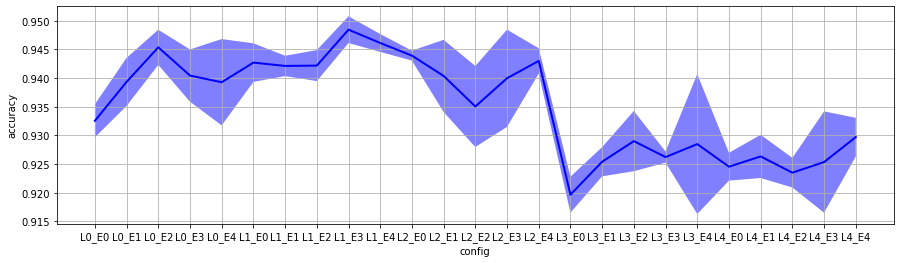

In [69]:
MOET_vary_learning_rate(mountaincar_dataset,
                        experts=2, 
                        depth=4, 
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=False,
                        num_runs=3)

MOET_vary_learning_rate(mountaincar_dataset,
                        experts=2,
                        depth=4,
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=True,
                        num_runs=3)

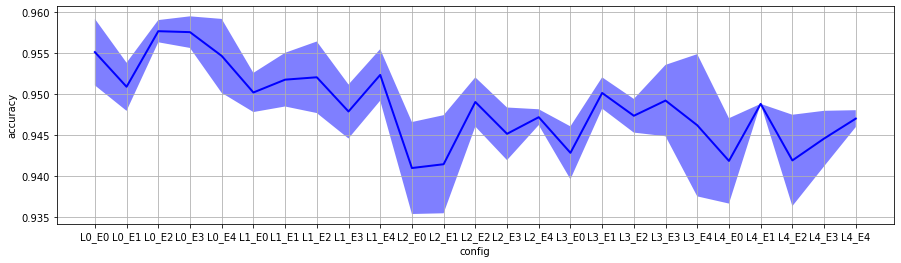

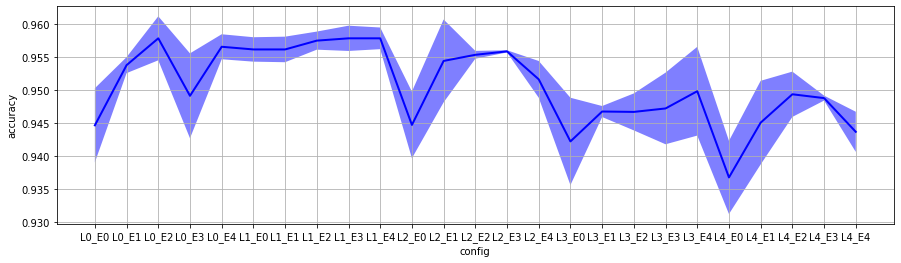

In [70]:
MOET_vary_learning_rate(mountaincar_dataset,
                        experts=2, 
                        depth=5, 
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=False,
                        num_runs=3)

MOET_vary_learning_rate(mountaincar_dataset,
                        experts=2,
                        depth=5,
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=True,
                        num_runs=3)

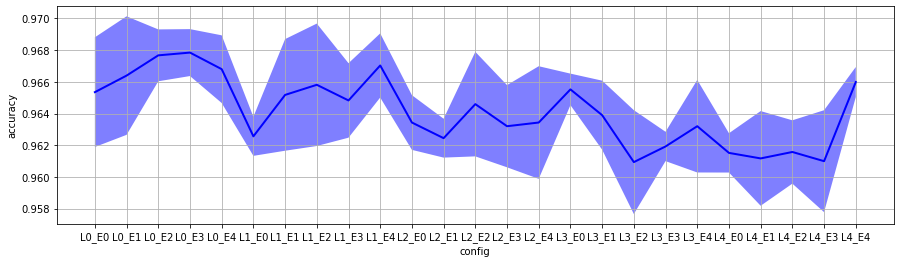

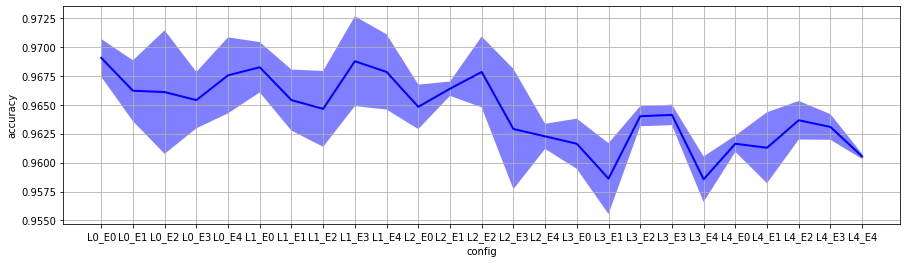

In [71]:
MOET_vary_learning_rate(mountaincar_dataset,
                        experts=2, 
                        depth=6, 
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=False,
                        num_runs=3)

MOET_vary_learning_rate(mountaincar_dataset,
                        experts=2,
                        depth=6,
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=True,
                        num_runs=3)

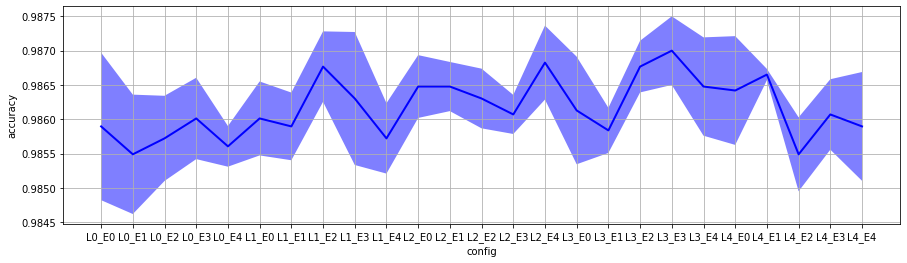

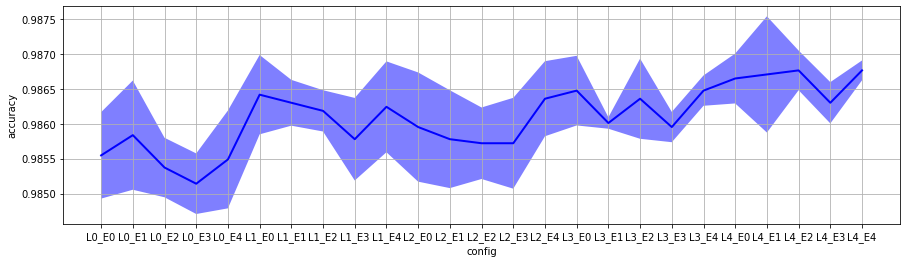

In [76]:
MOET_vary_learning_rate(mountaincar_dataset,
                        experts=2, 
                        depth=None, 
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=False,
                        num_runs=3)

MOET_vary_learning_rate(mountaincar_dataset,
                        experts=2,
                        depth=None,
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001],
                        learning_rate_decays=[1.],
                        max_epochs=[10, 20, 50, 100, 500],
                        train_gating_multiple_times=True,
                        num_runs=3)

max_epoch: 50


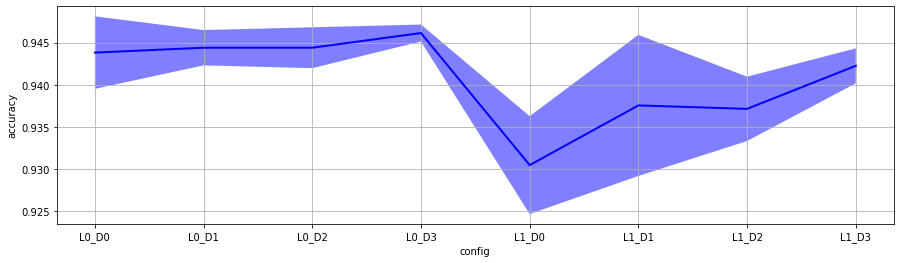

max_epoch: 100


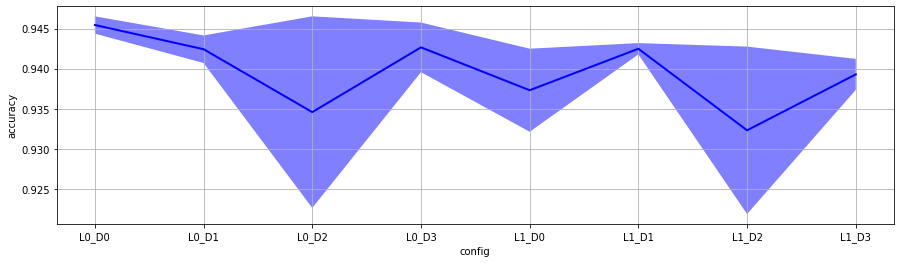

max_epoch: 500


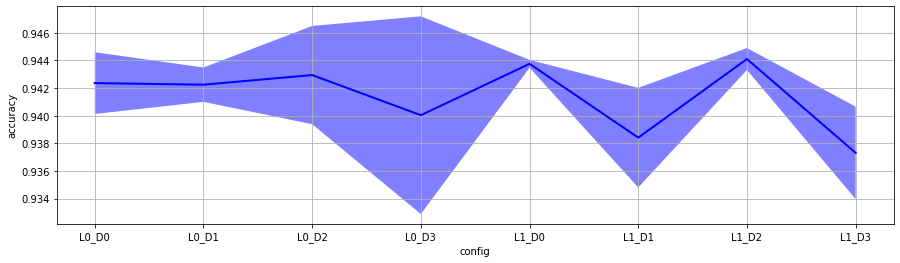

In [75]:
for max_epoch in [50, 100, 500]:
    print("max_epoch: {}".format(max_epoch))
    MOET_vary_learning_rate(mountaincar_dataset,
                            experts=2, 
                            depth=4, 
                            number_of_classes=3,
                            init_learning_rates=[1., 0.3],
                            learning_rate_decays=[1., 0.99, 0.98, 0.9],
                            max_epochs=[max_epoch],
                            num_runs=3)

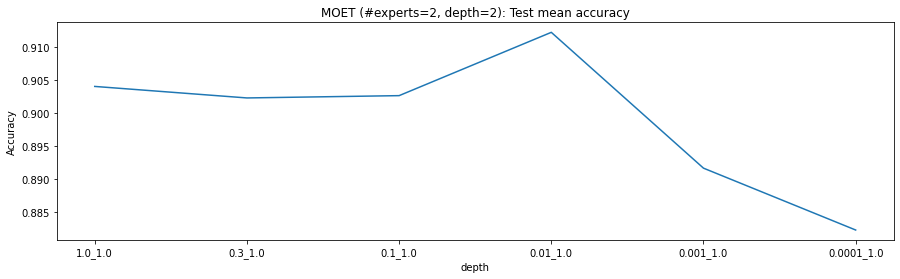

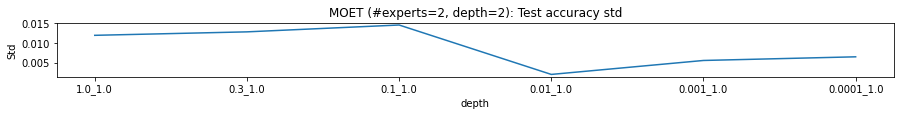

In [24]:
MOET_vary_learning_rate(mountaincar_dataset,
                        experts=2, 
                        depth=2, 
                        number_of_classes=3,
                        init_learning_rates=[1., 0.3, 0.1, 0.01, 0.001, 0.0001],
                        learning_rate_decays=[1.],
                        max_epoch=1000)